In [1]:
!pip install transformers

# Test model (Not important)

In [ ]:
import torch
from transformers import BertTokenizer,BertModel
tokenizer= BertTokenizer.from_pretrained("NlpHUST/vibert4news-base-cased")
bert_model = BertModel.from_pretrained("NlpHUST/vibert4news-base-cased")

line = "Tôi là sinh viên trường Bách Khoa Hà Nội ."
input_id = tokenizer.encode(text)
att_mask = [int(token_id > 0) for token_id in input_id]
input_ids = torch.tensor([input_id])
print(input_ids.shape)
att_masks = torch.tensor([att_mask])
with torch.no_grad():
    features = bert_model(input_ids,att_masks)

print(features.last_hidden_state.shape)
print(features.pooler_output.shape)

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained('NlpHUST/gpt2-vietnamese')
model = GPT2LMHeadModel.from_pretrained('NlpHUST/gpt2-vietnamese')

text = "Việt Nam là quốc gia có"
input_ids = tokenizer.encode(text, return_tensors='pt')
max_length = 300

sample_outputs = model.generate(input_ids,pad_token_id=tokenizer.eos_token_id,
                                   do_sample=True,
                                   max_length=max_length,
                                   min_length=max_length,
                                   top_k=40,
                                   num_beams=5,
                                   early_stopping=True,
                                   no_repeat_ngram_size=2,
                               )

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(sample_output.tolist())))
    print('\n---')


In [4]:
model.transformer.wte

Embedding(50257, 768)

In [5]:
model.transformer.wte.weight.shape[1]

768

# EDA

## Original text

### Document EDA

In [2]:
# Sentence count and word count in summary
import os
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
from transformers import BertTokenizer
cluster_path = '/kaggle/input/sust-feature-data-new/ViMs/ViMs/original'
word_len = []
sentence_len = []
tokenizer= BertTokenizer.from_pretrained("NlpHUST/vibert4news-base-cased")
        
for cluster_num in tqdm(os.listdir(cluster_path)):
    for text_name in os.listdir(os.path.join(cluster_path, cluster_num, 'original')):
        with open(os.path.join(cluster_path, cluster_num, 'original', text_name)) as f:
            check = False
            data = []
            for text in f.readlines():
                if check:
                    sentences = sent_tokenize(text.strip())
                    data += sentences
                if 'Content:' in text:
                    check = True
            sentence_len.append(len(data))
            text = ' '.join(data)
            input_id = tokenizer.encode(text)
            word_len.append(len(input_id))

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'BertTokenizer'.
100%|██████████| 300/300 [00:20<00:00, 14.86it/s]


Min sentence:  1
Max sentence:  104


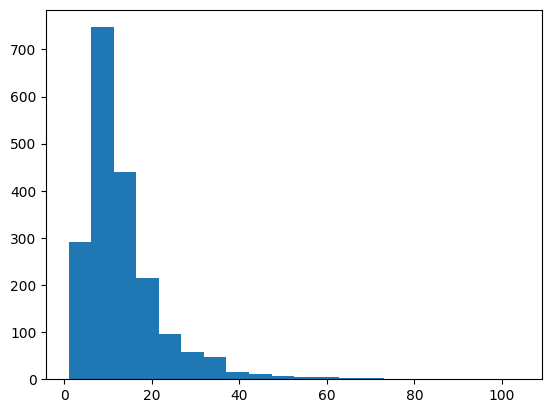

In [3]:
# Plot number of sentence in summary statistic
import matplotlib.pyplot as plt
print('Min sentence: ', min(sentence_len))
print('Max sentence: ', max(sentence_len))
plt.hist(sentence_len, bins=20)
plt.show()

Min word:  56
Max word:  3568


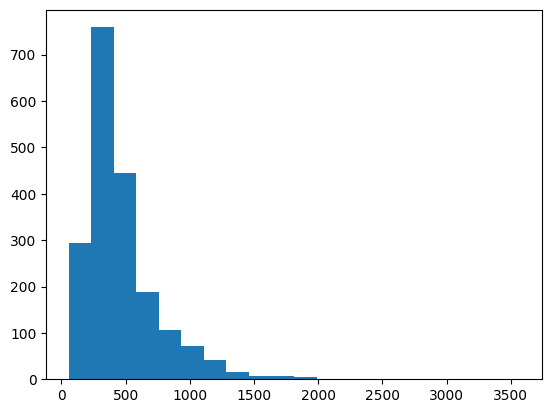

In [5]:
# Plot number of word in summary statistic
import matplotlib.pyplot as plt
print('Min word: ', min(word_len))
print('Max word: ', max(word_len))
plt.hist(word_len, bins=20)
plt.show()

### Cluster EDA (Concat all document in 1 cluster)

In [1]:
# Merge all sentence in one cluster into list
import os
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
cluster_path = '/kaggle/input/sust-feature-data-new/ViMs/ViMs/original'
sentence_data = []
for cluster_num in tqdm(os.listdir(cluster_path)):
    data = []
    for text_name in os.listdir(os.path.join(cluster_path, cluster_num, 'original')):
        with open(os.path.join(cluster_path, cluster_num, 'original', text_name)) as f:
            check = False
            for text in f.readlines():
                if check:
                    sentences = sent_tokenize(text.strip())
                    data += sentences
                if 'Content:' in text:
                    check = True
    sentence_data.append(data)                    

100%|██████████| 300/300 [00:08<00:00, 37.27it/s]


Min sentence:  24
Max sentence:  308


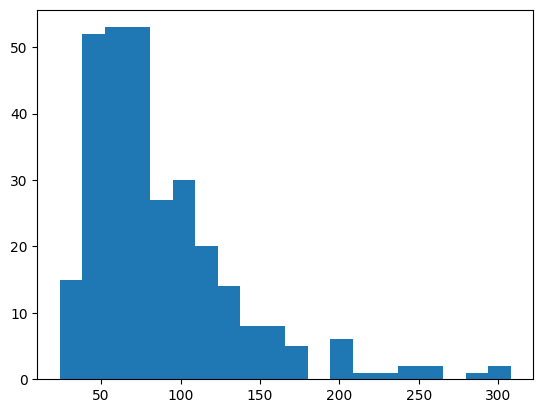

In [3]:
# Sentence cluster statistic
sentence_count = []
for i in sentence_data:
    sentence_count.append(len(i))
import matplotlib.pyplot as plt
print('Min sentence: ', min(sentence_count))
print('Max sentence: ', max(sentence_count))
plt.hist(sentence_count, bins=20)
plt.show()

## Summarize text

### Summary 0

In [16]:
# Sentence count and word count in summary
import os
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
from transformers import GPT2Tokenizer
cluster_path = '/kaggle/input/sust-feature-data-new/ViMs/ViMs/summary'
sentence_len = []
word_len = []
tokenizer = GPT2Tokenizer.from_pretrained('NlpHUST/gpt2-vietnamese')
for cluster_num in tqdm(os.listdir(cluster_path)):
    with open(os.path.join(cluster_path, cluster_num, '0.gold.txt')) as f:
        text = []
        for line in f.readlines():
            text.append(line.strip())
        text = ' '.join(text)
        sentences = sent_tokenize(text.strip())
        sentence_len.append(len(sentences))
        input_id = tokenizer.encode(text)
        word_len.append(len(input_id))

100%|██████████| 300/300 [00:01<00:00, 245.95it/s]


Min sentence:  2
Max sentence:  16


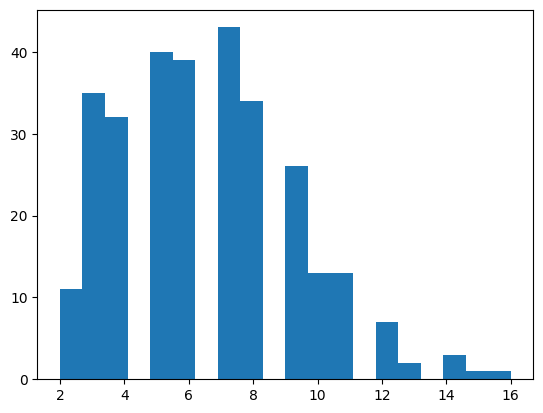

In [17]:
# Plot number of sentence in summary statistic
import matplotlib.pyplot as plt
print('Min sentence: ', min(sentence_len))
print('Max sentence: ', max(sentence_len))
plt.hist(sentence_len, bins=20)
plt.show()

Min word:  44
Max word:  527


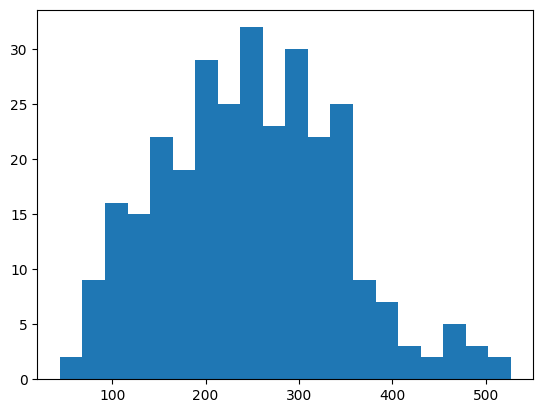

In [11]:
# Plot number of word in summary statistic
import matplotlib.pyplot as plt
print('Min word: ', min(word_len))
print('Max word: ', max(word_len))
plt.hist(word_len, bins=20)
plt.show()

### Summary 1

In [12]:
# Sentence count and word count in summary
import os
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
from transformers import GPT2Tokenizer
cluster_path = '/kaggle/input/sust-feature-data-new/ViMs/ViMs/summary'
sentence_len = []
word_len = []
tokenizer = GPT2Tokenizer.from_pretrained('NlpHUST/gpt2-vietnamese')
for cluster_num in tqdm(os.listdir(cluster_path)):
    with open(os.path.join(cluster_path, cluster_num, '1.gold.txt')) as f:
        text = []
        for line in f.readlines():
            text.append(line.strip())
        text = ' '.join(text)
        sentences = sent_tokenize(text.strip())
        sentence_len.append(len(sentences))
        input_id = tokenizer.encode(text)
        word_len.append(len(input_id))

100%|██████████| 300/300 [00:02<00:00, 144.92it/s]


Min sentence:  2
Max sentence:  23


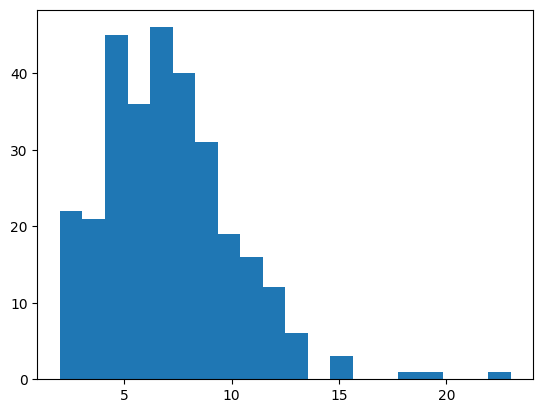

In [13]:
# Plot number of sentence in summary statistic
import matplotlib.pyplot as plt
print('Min sentence: ', min(sentence_len))
print('Max sentence: ', max(sentence_len))
plt.hist(sentence_len, bins=20)
plt.show()

Min word:  58
Max word:  606


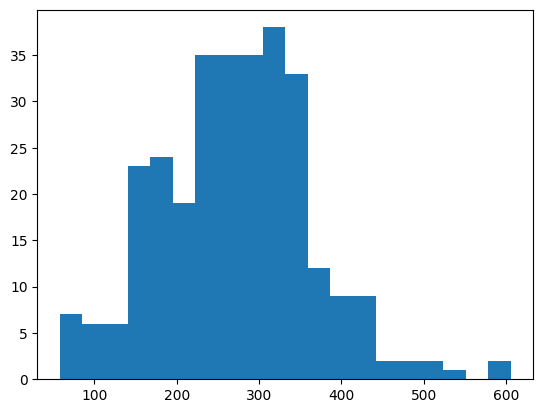

In [14]:
# Plot number of word in summary statistic
import matplotlib.pyplot as plt
print('Min word: ', min(word_len))
print('Max word: ', max(word_len))
plt.hist(word_len, bins=20)
plt.show()

# Data Extraction

## Original text extraction

- Ở đây, ta sẽ clustering toàn bộ câu trong 1 cluster thành K cụm (K = 5, 7, 10, 12), vector hoá các câu sử dụng Bert
- Sau khi có được clustering của các câu trong 1 cluster, ta sẽ tiến hành lấy vector đặc trưng cho từng cluster câu, cụ thể, ta sẽ đi theo 3 hướng:
    - Hướng 1: lấy giá trị vector trung bình của các câu trong cluster (mean)
    - Hướng 2: lấy giá trị centroid của cluster (centroid)
    - Hướng 3: lấy vector gần nhất với giá trị centroid (represent)

In [2]:
# Merge all sentence in one cluster into list
import os
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
cluster_path = '/kaggle/input/sust-feature-data-new/ViMs/ViMs/original'
sentence_data = {}
for cluster_num in tqdm(os.listdir(cluster_path)):
    data = []
    for text_name in os.listdir(os.path.join(cluster_path, cluster_num, 'original')):
        with open(os.path.join(cluster_path, cluster_num, 'original', text_name)) as f:
            check = False
            for text in f.readlines():
                if check:
                    sentences = sent_tokenize(text.strip())
                    data += sentences
                if 'Content:' in text:
                    check = True
    sentence_data[cluster_num] = data                    

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
100%|██████████| 300/300 [00:15<00:00, 19.78it/s]


In [3]:
import torch
from transformers import BertTokenizer,BertModel
import pandas as pd
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer= BertTokenizer.from_pretrained("NlpHUST/vibert4news-base-cased")
bert_model = BertModel.from_pretrained("NlpHUST/vibert4news-base-cased").to(device)
def get_sentence_embeddings(line):
    input_id = tokenizer.encode(line,add_special_tokens = True)
    att_mask = [int(token_id > 0) for token_id in input_id]
    input_ids = torch.tensor([input_id]).to(device)
    att_masks = torch.tensor([att_mask]).to(device)
    with torch.no_grad():
        features = bert_model(input_ids,att_masks)
    return features['pooler_output'].flatten().cpu().numpy()

embedding_sentence_data = {}
for key, value in tqdm(sentence_data.items()):
    data = pd.DataFrame(value)
    data.columns=['sentence']
    data['embeddings'] = data['sentence'].apply(get_sentence_embeddings)
    embedding_sentence_data[key] = data

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'BertTokenizer'.


100%|██████████| 300/300 [05:16<00:00,  1.05s/it]


In [4]:
num_cluster = 12
import os
os.chdir(r'/kaggle/working')

In [5]:
import nltk
nltk.download('punkt')
from nltk.cluster import KMeansClusterer
import numpy as np

def clustering_sentence(data, NUM_CLUSTERS):
    X = np.array(data['embeddings'].tolist())

    #initial_centroids = X[:10].tolist()

    kclusterer = KMeansClusterer(
            NUM_CLUSTERS,
            distance=nltk.cluster.util.cosine_distance,
            repeats=25,
            avoid_empty_clusters=True)

    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
    data['cluster'] = pd.Series(assigned_clusters, index=data.index)
    data['centroid'] = data['cluster'].apply(lambda x: kclusterer.means()[x])
    return data

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
clustering_embedding_sentence_data = {}
for key, value in tqdm(embedding_sentence_data.items()):
    data = clustering_sentence(value, num_cluster)
    clustering_embedding_sentence_data[key] = data

100%|██████████| 300/300 [08:08<00:00,  1.63s/it]


In [7]:
from scipy.spatial import distance_matrix
def distance_from_centroid(row):
    # type of emb and centroid is different, hence using tolist below
    return distance_matrix([row['embeddings']], [row['centroid'].tolist()])[0][0]

# Compute centroid distance to the data
for key, value in tqdm(clustering_embedding_sentence_data.items()):
    data = value.copy()
    data['distance_from_centroid'] = data.apply(distance_from_centroid, axis=1)
    clustering_embedding_sentence_data[key] = data

100%|██████████| 300/300 [00:03<00:00, 90.64it/s] 


Extract cluster vectors

In [ ]:
import os
def data_extraction(df, num_cluster):
    mean_data = []
    centroid_data = []
    
    for i in range(num_cluster):
#         print(len(df[df['cluster']==i]))
        mean_data.append(np.array(df[df['cluster']==i]['embeddings'].tolist()).mean(axis=0))
        centroid_data.append(df[df['cluster']==i]['centroid'].values[0])
    mean_data = np.array(mean_data)
    centroid_data = np.array(centroid_data)
    represent_data = np.array(df.sort_values('distance_from_centroid',ascending = True).groupby('cluster').head(1).sort_index().sort_values('cluster',ascending = True)['embeddings'].tolist())
    return mean_data, centroid_data, represent_data

save_path = os.path.join('{}_cluster'.format(num_cluster))
for key, value in tqdm(clustering_embedding_sentence_data.items()):
    mean_data, centroid_data, represent_data = data_extraction(value, num_cluster)
    if not os.path.exists(os.path.join(save_path, key)):
        os.makedirs(os.path.join(save_path, key))
    np.save(os.path.join(save_path, key, 'mean.npy'), mean_data)
    np.save(os.path.join(save_path, key, 'centroid.npy'), centroid_data)
    np.save(os.path.join(save_path, key, 'represent.npy'), represent_data)

In [ ]:
import shutil
from IPython.display import FileLink
shutil.make_archive('{}_cluster'.format(num_cluster), 'zip', '{}_cluster'.format(num_cluster))
FileLink(r'{}_cluster.zip'.format(num_cluster))

Extract cluster sentences

In [14]:
import json
def summary_extraction(df, num_cluster):
    summary_data = ' '.join(df.sort_values('distance_from_centroid',ascending = True).groupby('cluster').head(1).sort_index().sort_values('cluster',ascending = True)['sentence'].tolist())
    return summary_data
clustering_summary_data = {}
for key, value in tqdm(clustering_embedding_sentence_data.items()):
    summary_data = summary_extraction(value, num_cluster)
    clustering_summary_data[key] = summary_data
with open('/kaggle/working/clustering_summary.json'.format(num_cluster), 'w') as f:
    json.dump(clustering_summary_data, f)

100%|██████████| 300/300 [00:00<00:00, 818.44it/s]


## Summary extraction

In [2]:
# Sentence count and word count in summary
import os
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
cluster_path = '/kaggle/input/sust-feature-data-new/ViMs/ViMs/summary'
summary_data = {}
for cluster_num in tqdm(os.listdir(cluster_path)):
    with open(os.path.join(cluster_path, cluster_num, '1.gold.txt')) as f:
        text = []
        for line in f.readlines():
            text.append(line.strip())
        text = ' '.join(text)
    summary_data[cluster_num] = text

100%|██████████| 300/300 [00:02<00:00, 100.03it/s]


In [4]:
import json
with open('/kaggle/working/summary_data.json', 'w') as f:
    json.dump(summary_data, f)

## Embedding original data

In [1]:
# Merge all sentence in one cluster into list
import os
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
cluster_path = '/kaggle/input/sust-feature-data-new/ViMs/ViMs/original'
data = {}
for cluster_num in tqdm(os.listdir(cluster_path)):
    data_cluster = []
    for text_name in os.listdir(os.path.join(cluster_path, cluster_num, 'original')):
        with open(os.path.join(cluster_path, cluster_num, 'original', text_name)) as f:
            check = False
            data_text = []
            for text in f.readlines():
                if check:
                    sentences = sent_tokenize(text.strip())
                    data_text += sentences
                if 'Content:' in text:
                    check = True
            data_text = ' '.join(data_text)
            data_cluster.append(data_text)
    data[cluster_num] = data_cluster                    

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
100%|██████████| 300/300 [00:08<00:00, 37.15it/s]


In [3]:
import torch
from transformers import BertTokenizer,BertModel
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer= BertTokenizer.from_pretrained("NlpHUST/vibert4news-base-cased")
bert_model = BertModel.from_pretrained("NlpHUST/vibert4news-base-cased").to(device)
def get_cluster_embedding(cluster_data):
    input_data = tokenizer(cluster_data, max_length=512, padding='max_length', truncation=True, return_tensors="pt")
    input_ids = input_data['input_ids'].to(device)
    attention_mask = input_data['attention_mask'].to(device)
    with torch.no_grad():
        features = bert_model(input_ids, attention_mask)
    return features['pooler_output'].mean(axis=0).tolist()

embedding_cluster_data = {}
for key, value in tqdm(data.items()):
    embedding_cluster_data[key] = get_cluster_embedding(value)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'BertTokenizer'.
100%|██████████| 300/300 [01:26<00:00,  3.48it/s]


In [6]:
import json
with open('/kaggle/working/original_data_embedding.json', 'w') as f:
    json.dump(embedding_cluster_data, f)